In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

X = np.array([[-1,-1], [-2, -1],[-3, -2], [1,1], [2,1], [3,2]])
Y = np.array([1,1,1,2,2,2])

In [2]:
clf = GaussianNB()
clf.fit(X,Y)

GaussianNB()

In [3]:
print(clf.predict([[-0.8,-1]]))
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y,  np.unique(Y))
print(clf_pf.predict([[-0.8, -1]]))

[1]
[1]


# Naive Bayes Insults

In [4]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.pipeline import Pipeline

%matplotlib inline

sns.set_style('darkgrid')

In [5]:
insults_df = pd.read_csv("/Users/patricksmith/desktop/train.csv", encoding="utf-8")

In [6]:
insults_df.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [7]:
insults_df.tail()

,Insult,Date,Comment
3942,1,20120502172717Z,"""you are both morons and that is never happening"""
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo..."
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ..."
3946,0,20120515200734Z,"""You're all upset, defending this hipster band..."


In [8]:
cvt = CountVectorizer(stop_words="english")
X_all = cvt.fit_transform(insults_df["Comment"])
freqs = [(word, X_all.getcol(idx).sum()) for word, idx in cvt.vocabulary_.items()]
print sorted (freqs, key = lambda x: -x[1])

[(u'xa0', 1223), (u'like', 718), (u'xc2', 615), (u'just', 557), (u'don', 436), (u'people', 419), (u'know', 328), (u'think', 302), (u'fuck', 242), (u'x80', 224), (u'right', 223), (u'time', 219), (u'xe2', 213), (u'make', 211), (u'good', 207), (u'really', 194), (u'http', 192), (u'say', 183), (u'way', 182), (u'little', 174), (u'want', 171), (u'ass', 171), (u'fucking', 170), (u'obama', 159), (u'going', 154), (u'need', 154), (u'stupid', 154), (u'did', 153), (u'man', 153), (u'got', 150), (u'shit', 148), (u'idiot', 144), (u'better', 137), (u'life', 133), (u'look', 129), (u'does', 125), (u'gay', 125), (u'll', 124), (u'years', 118), (u'said', 118), (u'money', 115), (u'bitch', 108), (u'come', 108), (u'white', 106), (u'day', 104), (u'lol', 100), (u'year', 100), (u'big', 100), (u'stop', 98), (u'let', 95), (u'post', 94), (u'didn', 92), (u'ni', 92), (u'love', 90), (u'doesn', 90), (u'things', 89), (u'thing', 89), (u'feel', 89), (u'dumb', 88), (u'dont', 88), (u'world', 87), (u've', 86), (u'best', 85), 

In [10]:
cvt = CountVectorizer(stop_words='english', ngram_range=(2,4), max_features=75)
X_all = cvt.fit_transform(insults_df["Comment"])
freqs = [(word, X_all.getcol(idx).sum()) for word, idx in cvt.vocabulary_.items()]
print sorted (freqs, key = lambda x: -x[1])

[(u'xc2 xa0', 379), (u'xe2 x80', 209), (u'xa0 xa0', 144), (u'http shar es', 68), (u'http shar', 68), (u'shar es', 68), (u'trade trade', 63), (u'trade trade trade', 62), (u'trade trade trade trade', 61), (u'u2026 u2026', 59), (u'xa0 xa0 xa0', 57), (u'u2026 u2026 u2026', 52), (u'xa0 xa0 xa0 xa0', 49), (u'xc2 xa0 xc2', 46), (u'xa0 xc2', 46), (u'u2026 u2026 u2026 u2026', 45), (u'don know', 43), (u'x80 x99s', 41), (u'xe2 x80 x99s', 41), (u'xc2 xa0 xc2 xa0', 35), (u'look like', 35), (u'xa0 xc2 xa0', 35), (u'bit ly', 34), (u'x80 x9d', 34), (u'xe2 x80 x9d', 34), (u'bit ly mrzlgv', 32), (u'ly mrzlgv', 32), (u'gay marriage', 32), (u'x80 x99t', 30), (u'xe2 x80 x99t', 30), (u'http bit', 28), (u'http bit ly', 28), (u'http bit ly mrzlgv', 27), (u'looks like', 26), (u'just like', 24), (u'bit ly mrzlgv http', 24), (u'ly mrzlgv http', 24), (u'mrzlgv http', 24), (u'sound like', 23), (u'xa0 just', 23), (u'people like', 23), (u'united states', 23), (u'don like', 20), (u'don think', 19), (u'mrzlgv http sha

Do a train/test/split

In [11]:
training_size = int(insults_df.shape[0] * .7)

insults_train = insults_df.sample(n=training_size, replace=True)

mask = insults_df.index.isin(insults_train.index)
insults_test = insults_df[~mask]

insults_train.shape[0], insults_test.shape[0]

(2762, 1973)

Now, we can create a list of stop words to take out the "X" codes

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['xa0', 'x80', 'xc2', 'xe3']

In [15]:
from sklearn.ensemble import RandomForestClassifier

Create a pipelines with your entire process

In [16]:
pipeline = Pipeline([
    ('vect', CountVectorizer(lowercase=True, strip_accents='unicode', stop_words=stop)),
    ('tfidf', TfidfTransformer()),
    ('cls', RandomForestClassifier())
]) 
pipeline.fit(insults_train["Comment"], insults_train["Insult"])
predicted = pipeline.predict(insults_test["Comment"])
pipeline.score(insults_test["Comment"], insults_test["Insult"])

0.80283831728332489

Check the classification report

In [17]:
print classification_report(insults_test["Insult"], predicted, target_names=['Insult', "Neutral"])

             precision    recall  f1-score   support

     Insult       0.82      0.95      0.88      1453
    Neutral       0.73      0.40      0.52       520

avg / total       0.79      0.80      0.78      1973



In [19]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None: 
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [20]:
crap = insults_df.sample(n=20000, replace=True)

<module 'matplotlib.pyplot' from '/Users/patricksmith/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

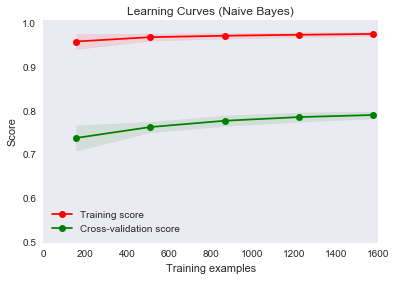

In [21]:
cv = ShuffleSplit(insults_df.shape[0], n_iter=100, test_size=0.6, random_state=0)
plot_learning_curve(pipeline, "Learning Curves (Naive Bayes)", insults_df['Comment'], insults_df['Insult'], ylim=(0.5, 1.01), cv=cv, n_jobs=4)

In [22]:
from sklearn.metrics import roc_curve

def plot_roc(y, probs, threshmarkers=None):
    fpr, tpr, thresh = roc_curve(y, probs)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, lw=2)
   
    if threshmarkers is None:
        threshmarkers = np.linspace(0, 1, 11)
    for t in threshmarkers:
        k = np.abs(thresh-t).argmin()
        x = fpr[k]
        y = tpr[k]
        plt.scatter(x, y, c="red", marker="x", s=50, lw=2, alpha=1.0)
        plt.annotate("%0.2f (%0.4f, %0.4f)" % (t, x, y), (x, y), textcoords="offset points", xytext=(25, -10), ha="left", va="center", fontsize=7, arrowprops={"arrowstyle":"->", "connectionstyle":"arc3,rad=0"})
    plt.xlabel("False Positive Rate\n(1 - Specificity)")
    plt.ylabel("True Positive Rate\n(Sensitivity)")
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xticks(np.linspace(0, 1, 21), rotation=45)
    plt.yticks(np.linspace(0, 1, 21))
    plt.show()

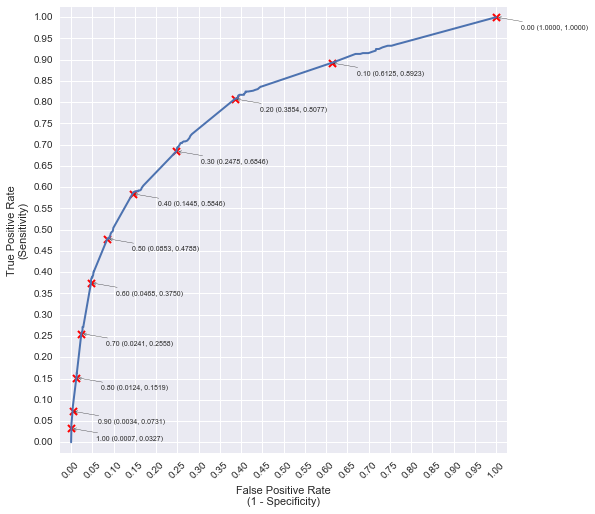

In [23]:
predicted = pipeline.predict_proba(insults_test['Comment'])
plot_roc(insults_test['Insult'], predicted[:, 1])